<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_ECDA/blob/main/Text%20analysis/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis-Read Me First**

This is tutorial to show you how you can do sentiment analysis by using packages available in Google Colab. The package we are going to use are TextBlob and nltk sentiment vader.

**TextBlob sentiment analysis** element can allow you to calculate the polarity score and subjectivity score of the text. The polarity score is a float within the range [-1.0, 1.0] where -1 is very negative and 1.0 is very positive. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Here is the documentation of TextBlob: https://textblob.readthedocs.io/en/dev/quickstart.html

**Vader Sentiment analysis** is another approach for doing sentiment analysis, and VADER means Valence Aware Dictionary and Sentiment Reasoner.Vader is a lexicon and rule-based feeling analysis instrument that is explicitly sensitive to suppositions communicated in web-based media. Vader utilizes a mix of lexical highlights (e.g., words) that are, for the most part, marked by their semantic direction as positive or negative or neutral. Thus, Vader not only tells about the Polarity score yet, in addition, it tells us concerning how positive or negative a text is. What we are going to use the the vader analysis package from **NLTK** (which is a very famous library for NLP and you will see it a lot when we are doing other text mining tasks). By running the analysis using this package, you will get 4 polarity scores, namely compound, neg(ative), pos(itive), neu(tral). About the scoring, please check: https://github.com/cjhutto/vaderSentiment#about-the-scoring. Usually we use +-0.05 as benchmark to classify the sentence as positive or negative or neutral.

Now is time to start trying with some examples. First, we try with single sentence, and then we will do sentiment analysis for multiple text imported as csv file.

### **Let's start!**

### **1. Sentiment analysis of single text**

In [ ]:
# Here we input a sentence as an example
# Click the play button one the left in the each cell to run the code.
sentence = "The show is great and I would like to watch again"

In [ ]:
from textblob import TextBlob
# import the TextBlob package.

In [ ]:
# TextBlob().sentiment is the method used to calculate the score. put the sentence/text into the bracket
# After you run the code you will be able to see the scores.
TextBlob(sentence).sentiment

# the polarity is between [-1,1]. while closer to -1 is more negative, closer to 1 is more positive.

Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
# This is another python package for sentiment analysis, and it's called nltk vader. SentimenIntensityAnalyzer() is the function.
import nltk
nltk.download('vader_lexicon')

# Before run the function, you need to import the nltk package and download the vader_lexicon first.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Now it's all set up and you need to import the sentiment_intensity_analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Here you can use the analyzer function to calculate the score of the sentence.
# After you run the function you should be able to see 4 scores.
sid.polarity_scores(sentence)

# same as textblob, the compound score is between -1 and 1, and closer to 1 the higher positivity of the text.

{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.765}

The above are the simple examples of calculating sentiment score for single sentence. Below we are starting to do sentiment analysis using nltk sentiment vader for multiple text by importing the text file and output the sentiment analysis result as dataframe saved as csv file combiled with the original text as well.

### **2. Sentiment analysis of batch text**

#### 2.1 Sentiment analysis with TextBlob

In [1]:
# Except for doing sentiment analysis for one single sentence, it's also available for you to import a dataframe and do the sentiment analysis for the whole batch.
from google.colab import files
uploaded = files.upload()
# once you run this code, it will prompt you to select a file. You just need to "Choose a file" (any file you want to do sentiment analysis) from your laptop.

Saving Anydo_review_new.csv to Anydo_review_new.csv


In [11]:
# once you upload the data to the cloud, you can read the data into dataframe. Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import pandas as pd
data_path = 'Anydo_review_new.csv' # change the csv file name to your file name that you uploaded
df = pd.read_csv(data_path)
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at
0,gp:AOqpTOEcWS_b8b4P2gClKovxXAPg3il0AD0ZnGw9RxY...,Unable to use it as it won't work with my Goog...,1,13,5.7.0.20,11/01/2021 01:12
1,gp:AOqpTOEidRmDaHGYPZW21SVfBkeqTruAzg7LAmCPL2_...,I downloaded this because of the cross platfor...,1,81,5.7.0.20,22/12/2020 18:31
2,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,I am starting to hate this app! Every time the...,1,67,5.7.0.10,02/12/2020 15:52
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,"Liked Any.do at first, enough that I even sign...",1,102,5.7.0.10,22/11/2020 23:42
4,gp:AOqpTOEmghRiCCy0_FYbWBSoRm2ff2hzFTbEjgQ9svu...,They made me sign up for premium just to have ...,1,2,5.7.0.20,31/12/2020 01:49


In [3]:
# set the target column to the review column

target_column = 'content'

In [4]:
# you might need to do some text cleaning before sentiment analysis. One basic requirement for running the sentiment analysis function, you need to make sure the target column has no null values.
df = df.dropna(subset = [target_column]) # Here I just delete the rows if the target column is null

In [9]:
from textblob import TextBlob
import numpy as np
df['Polarity'] = df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
df['Subjectivity'] = df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)
df['Sentiment'] = np.where(df['Polarity']>0, 'Positive',np.where(df['Polarity']<0,'Negative', 'Neutral')) # here we set 0 as the benchmark. you can adjust based on your data

In [7]:
# sort by polarity (low to high)
sorted_df = df.sort_values(by=['Polarity'])

# print top 5 positive and negative
print("Most positive #5 reviews ")
print(sorted_df[target_column].tail())
print("\n") # print line break
print("Most negative #5 reviews ")
print(sorted_df[target_column].head())

Most positive #5 reviews 
1049    An excellent App for scheduling and monitoring...
1077    Flawless app I'm using the premium version and...
1172                                              Perfect
650     Awesome app but the widget doesn't sync across...
1176              Excellent Features. Found what I needed
Name: content, dtype: object


Most negative #5 reviews 
66     Uninstalled it as soon as it started sending m...
170                                    Terrible app ui !
137                                            pathetic.
702    This is so frustrating!!! I set a event for so...
465    This is so frustrating!!! I set a event for so...
Name: content, dtype: object


<Axes: xlabel='Sentiment', ylabel='count'>

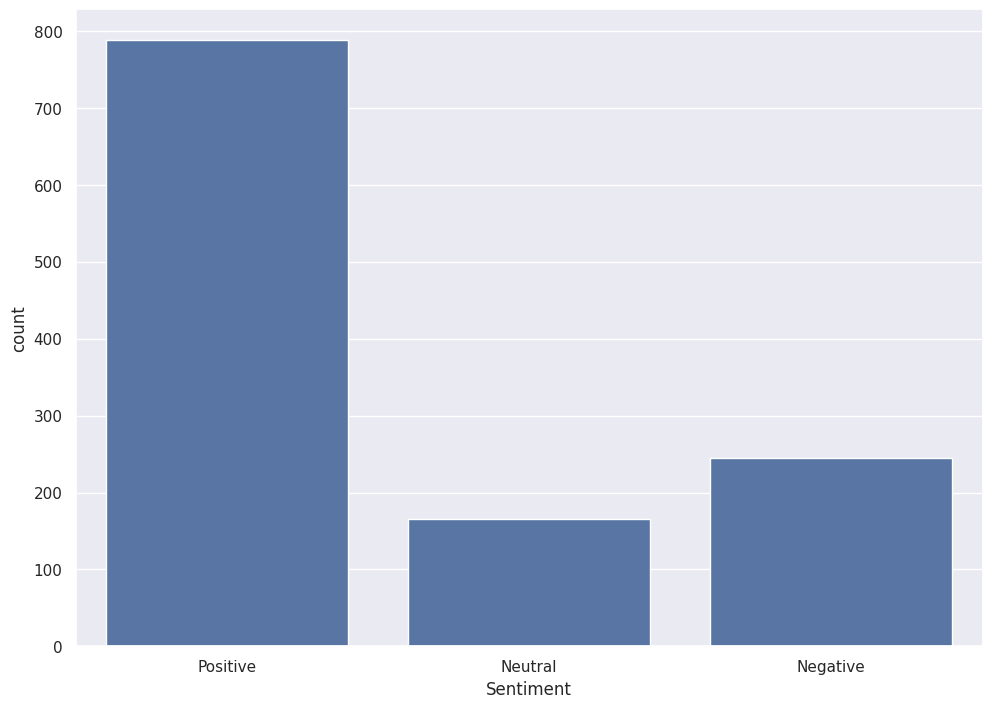

In [10]:
# Sentiment analysis visualisation
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Sentiment',data = df,order=['Positive','Neutral','Negative'])

In [ ]:
# finally, save the new dataframe with all the scores to the local machine.

df.to_csv('sentiment_textblob.csv', index=False) # save the file to google drive
files.download('sentiment_textblob.csv') # download the file to your local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 2.2 Sentiment analysis with NLTK VADER

In [ ]:
# Except for doing sentiment analysis for one single sentence, it's also available for you to import a dataframe and do the sentiment analysis for the whole batch.
from google.colab import files
uploaded = files.upload()
# once you run this code, it will prompt you to select a file. You just need to "Choose a file" (any file you want to do sentiment analysis) from your laptop.

In [12]:
# once you upload the data to the cloud, you can read the data into dataframe. Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import pandas as pd
data_path = 'Anydo_review_new.csv' # change the csv file name to your file name that you uploaded
df = pd.read_csv(data_path) # change the csv file name to your file name that you uploaded
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at
0,gp:AOqpTOEcWS_b8b4P2gClKovxXAPg3il0AD0ZnGw9RxY...,Unable to use it as it won't work with my Goog...,1,13,5.7.0.20,11/01/2021 01:12
1,gp:AOqpTOEidRmDaHGYPZW21SVfBkeqTruAzg7LAmCPL2_...,I downloaded this because of the cross platfor...,1,81,5.7.0.20,22/12/2020 18:31
2,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,I am starting to hate this app! Every time the...,1,67,5.7.0.10,02/12/2020 15:52
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,"Liked Any.do at first, enough that I even sign...",1,102,5.7.0.10,22/11/2020 23:42
4,gp:AOqpTOEmghRiCCy0_FYbWBSoRm2ff2hzFTbEjgQ9svu...,They made me sign up for premium just to have ...,1,2,5.7.0.20,31/12/2020 01:49


In [13]:
# set the target column to the review column

target_column = 'content'

In [14]:
# you might need to do some text cleaning before sentiment analysis. One basic requirement for running the sentiment analysis function, you need to make sure the target column has no null values.
df = df.dropna(subset = [target_column]) # Here I just delete the rows if the target column is null (in this case, it's "Review" column)

In [15]:
# first, import the package (suppose we haven't imported it yet) run the analyzer (SentimentIntensityAnalyzer())
import nltk
import numpy as np
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Then create new columns for your dataframe (compound, pos, neu, neg) with empty dictionary
# With for loop, we get the scores for each review and append the scores to the dictionary

Result = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }

for review in df[target_column]:
    score = sid.polarity_scores(review)
    Result['pos'].append(score['pos'])
    Result['neu'].append(score['neu'])
    Result['neg'].append(score['neg'])
    Result['compound'].append(score['compound'])

# Once this is done, new columns are created and dictionary is transformed to the dataframe

df['compound'] = pd.DataFrame(Result)['compound']
df['pos'] = pd.DataFrame(Result)['pos']
df['neu'] = pd.DataFrame(Result)['neu']
df['neg'] = pd.DataFrame(Result)['neg']
df['sentiment'] = np.where(df['compound']>=0.05, 'Positive',np.where(df['compound']<=-0.05,'Negative', 'Neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
# sort by polarity (low to high)
sorted_df = df.sort_values(by=['compound'])

# print top 5 positive and negative
print("Most positive #5 reviews ")
print(sorted_df[target_column].tail())
print("\n") # print line break
print("Most negative #5 reviews ")
print(sorted_df[target_column].head())

Most positive #5 reviews 
511     Great app! But have a few suggestions that wou...
258     Sorry, not Impressed I'm sorry to leave a poor...
1075    Truly the best planning app! I was looking for...
974     It's OK but it's not for me. I'm a student and...
839     It's OK but it's not for me. I'm a student and...
Name: content, dtype: object


Most negative #5 reviews 
256    It's a mess. I add new tasks and tag them. But...
505    Used to think it was a 5 star app but they kee...
2      I am starting to hate this app! Every time the...
169    I am starting to hate this app! Every time the...
897    It suddenly quit syncing. I've tried logging o...
Name: content, dtype: object


<Axes: xlabel='sentiment', ylabel='count'>

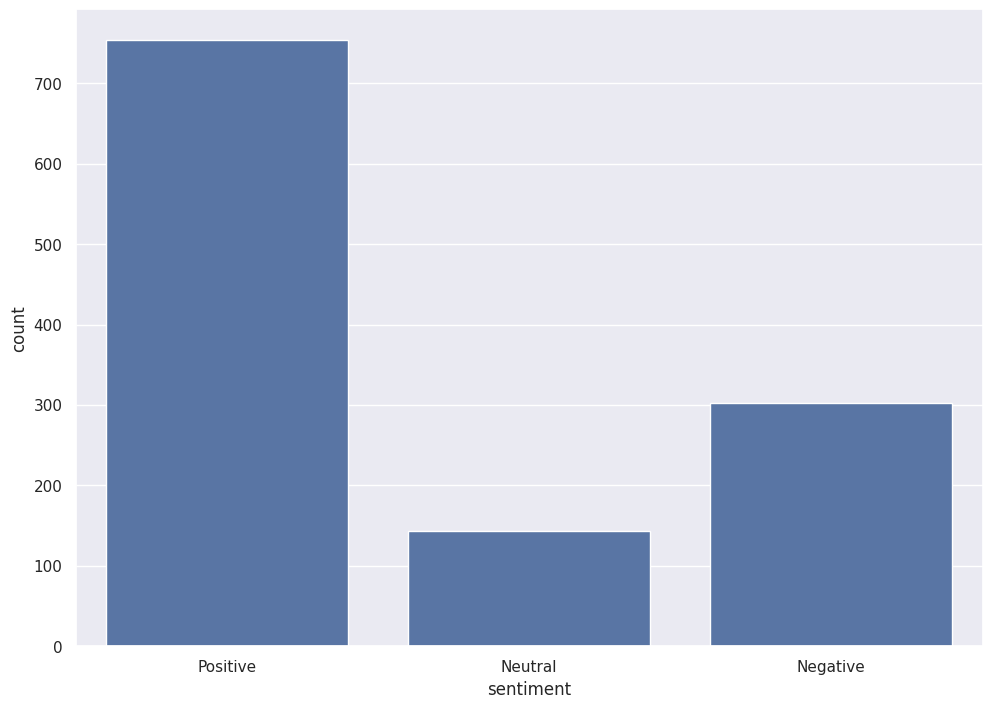

In [17]:
# Sentiment analysis visualisation
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='sentiment',data = df,order=['Positive','Neutral','Negative'])

In [ ]:
# finally, save the new dataframe with all the scores to the local machine.

df.to_csv('sentiment_nltk.csv', index=False) # save the file to google drive
files.download('sentiment_nltk.csv') # download the file to your local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Hint for interpretation and analysis of the sentiment scores**

Once you got your result, there is some tips for you to analyse your data. First, you can take a look at the distribution of the polarity (postive vs. negative) and have some overall ideas about the customer opinion; second, if you also have the rating score given by the users, you can compare the sentiment score you got with the rating and check whether there is gap between them. Sentiment analysis is not always reliable. Third, don't just look at the scores. You need to understand why the positive or negative reviews are given. And think how we can help improve the customer service or our product based on the customer feedback. you can take a look at some reviews with low or high polarity score and have some analysis on the content. You can also combine sentiment analysis and topic modeling so you can understand the key topics covered by spefic sentiment type of reviews. Please check another scripts about topic modeling.